### 导入数据NIH_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

In [2]:
year = 2010

data =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/RePORTER_PRJ_C_FY'+str(year)+'.csv',encoding = 'ISO-8859-15',header=0)
data_1 =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/RePORTER_PRJABS_C_FY'+str(year)+'.csv',encoding = 'ISO-8859-15',header=0)
data_2 =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/RePORTER_PUBLNK_C_'+str(year)+'.csv',encoding = 'ISO-8859-15',header=0)
data_3 =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/RePORTER_PUB_C_'+str(year)+'.csv',encoding = 'ISO-8859-15',header=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_29479/3177807676.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/RePORTER_PRJ_C_FY'+str(year)+'.csv',encoding = 'ISO-8859-15',header=0)


In [3]:
#删除多余列
del data['ACTIVITY']
del data['ARRA_FUNDED']
del data['ED_INST_TYPE']
del data['SERIAL_NUMBER']
del data['SUFFIX']

In [4]:
#删除字符串中的(contact)
# 将目标列的所有元素转换为字符串类型
data["PI_NAMEs"] = data["PI_NAMEs"].astype(str)
# 用正则表达式替换包含 "contact" 和括号的文本
data["PI_NAMEs"] = data["PI_NAMEs"].apply(lambda x: re.sub(r"\(.*?\)|contact", "", x))

# 将目标列的所有元素转换为字符串类型
data["PI_IDS"] = data["PI_IDS"].astype(str)
# 用正则表达式替换包含 "contact" 和括号的文本
data["PI_IDS"] = data["PI_IDS"].apply(lambda x: re.sub(r"\(.*?\)|contact", "", x))

In [5]:
#合并数据集
data_temp = pd.merge(data,data_1,how='left',on='APPLICATION_ID')
data = pd.merge(data_temp,data_2,how='left',left_on='CORE_PROJECT_NUM',right_on='PROJECT_NUMBER')
data = pd.merge(data,data_3,how='left',on='PMID')

In [149]:
# #处理PRO并保存
# # 对PROJECT_NUMBER进行分组，并将每个分组内的PMID用;连接成一行字符串
# df_grouped = data.groupby('PROJECT_NUMBER').agg({'PUB_TITLE': lambda x: ';'.join(x.astype(str))})

# # 通过merge方法将分组结果合并回原始DataFrame
# merged_df = pd.merge(data_temp, df_grouped, how='left', left_on='CORE_PROJECT_NUM',right_on='PROJECT_NUMBER')

# #保存的特征
# PRO_list = ['ABSTRACT_TEXT','APPLICATION_ID','BUDGET_START','BUDGET_END','CORE_PROJECT_NUM','FULL_PROJECT_NUM','FUNDING_MECHANISM','PROGRAM_OFFICER_NAME','PROJECT_START','PROJECT_END','PROJECT_TERMS','PROJECT_TITLE','STUDY_SECTION','STUDY_SECTION_NAME','SUPPORT_YEAR','TOTAL_COST','TOTAL_COST_SUB_PROJECT','SUBPROJECT_ID','NIH_SPENDING_CATS','APPLICATION_TYPE','AWARD_NOTICE_DATE','CFDA_CODE','FOA_NUMBER','FUNDING_ICs','IC_NAME','PHR','ORG_NAME','PI_NAMEs','PUB_TITLE','FY']
# #PRO_list = [col for col in PRO_list if col in merged_df.columns]
# #2012 ['FUNDING_ICs']
# #保存
# merged_df[PRO_list].to_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'_PRO.csv',index=False)

In [150]:
# #80796
# #读取18年数据
# data =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_2018/data_2018_PRO.csv',encoding = 'ISO-8859-15',header=0)
# #分成两份保存
# data.iloc[:40000].to_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_2018/data_2018_PRO_1.csv',index=False)
# data.iloc[40000:].to_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_2018/data_2018_PRO_2.csv',index=False)

In [151]:
#输出每列Nan数量
data.isna().sum()

APPLICATION_ID                 0
ADMINISTERING_IC               0
APPLICATION_TYPE            1448
AWARD_NOTICE_DATE         205067
BUDGET_START               11697
BUDGET_END                 11701
CFDA_CODE                 480682
CORE_PROJECT_NUM               0
FOA_NUMBER                383724
FULL_PROJECT_NUM               0
FUNDING_ICs                 3929
FUNDING_MECHANISM              0
FY                             0
IC_NAME                        0
NIH_SPENDING_CATS          73511
ORG_CITY                   10697
ORG_COUNTRY                10670
ORG_DEPT                  282055
ORG_DISTRICT               12913
ORG_DUNS                   13184
ORG_FIPS                   11559
ORG_NAME                     196
ORG_STATE                  12415
ORG_ZIPCODE                12179
PHR                       587835
PI_IDS                         0
PI_NAMEs                       0
PROGRAM_OFFICER_NAME      479028
PROJECT_START             168758
PROJECT_END               161442
PROJECT_TE

### 数据预处理

In [4]:
#按分隔符拆分列
def columns_split(data,columns,seps):
    df_temp=data[columns].str.split(seps,expand=True)
    return df_temp,len(df_temp.columns)

#两列分隔dataframe按列合并然后修改列名
def split_concat(data_split,data_split_1):
    for i in range(len(data_split.columns)):
        data_split_1.rename(columns={i:i+len(data_split.columns)}, inplace=True)
    data = pd.concat([data_split,data_split_1],axis=1,join='outer')
    return data


df_temp,df_temp_len = columns_split(data,'PI_IDS',';')
df_temp1,df_temp1_len = columns_split(data,'PI_NAMEs',';')
data_temp = split_concat(df_temp,df_temp1)
data_temp = pd.concat([data,data_temp],axis=1)

In [ ]:
#形成分隔后的dataframe
new_data = pd.DataFrame(columns=[])

PI_IDS_list = []
PI_NAMEs_list = []
#按分列后移到下一行生成新的dataframe
#1、批量创建list
for i in range(len(data.columns)):
    locals()['data_columns_list_' + str(i)] = []

#2、把元素添加到list
for i in range(len(df_temp.columns)):
    for j in range(len(data_temp)):
        if data_temp[i][j] != None and data_temp[i][j] != ' ' :
            PI_IDS_list.append(data_temp[i][j])
            PI_NAMEs_list.append(data_temp[i+len(df_temp.columns)][j]) 
            for k in range(len(data.columns)):
                locals()['data_columns_list_' + str(k)].append(data[data.columns[k]][j])

#3、list生成新dataframe
for i in range(len(data.columns)):
    new_data[data.columns[i]] = locals()['data_columns_list_' + str(i)]
new_data['PI_IDS'] = PI_IDS_list
new_data['PI_NAMEs'] = PI_NAMEs_list
# #4、添加实体关系
# PARTICIPATE_list = []
# BELONG_list = []
# for i in range(len(new_data)):
#     PARTICIPATE_list.append('participate')
#     BELONG_list.append('belong')
# new_data['PARTICIPATE'] = PARTICIPATE_list
# new_data['BELONG'] = BELONG_list
#5、展示新dataframe
data = new_data
data

In [ ]:
#处理论文数据集
#将dataframe单列分隔形成新数据集
def split_concat_ori(data,data_columns,segs):
    data_temp = data[data_columns].str.split(segs,expand=True)
    data_temp = pd.concat([data,data_temp],axis=1,join='outer')
    #data_temp.columns = list(data.columns)+list(data_temp.columns[:len(data_temp.columns)-len(data.columns)])
    return data_temp

data_3 = split_concat_ori(data_3,'AUTHOR_LIST',';')
# 替换NaN值
data_3.fillna(
    '',  # nan的替换值
    inplace=True  # 是否跟换源文件
)

# 使用melt()方法将score1和score2移动到一列下方
df = pd.melt(data_3, id_vars=['AFFILIATION','AUTHOR_LIST','COUNTRY','ISSN','JOURNAL_ISSUE','JOURNAL_TITLE','JOURNAL_TITLE_ABBR','JOURNAL_VOLUME','LANG','PAGE_NUMBER','PMC_ID','PMID','PUB_DATE','PUB_TITLE','PUB_YEAR'], 
             value_vars=range(data_3.columns[-1:][0]), 
             var_name='AUTHOR_NUM', 
             value_name='AUTHOR')

#删除多余行数
df=df[(df.AUTHOR!='')]

#筛选data中包含的作者行
arr = list(data['PI_NAMEs'])
df['AUTHOR'] = df['AUTHOR'].str.upper()
df = df[df["AUTHOR"].isin(arr)]
#重置index
df.reset_index(drop = True,inplace =True)
df['PUBLISH']= 'publish'
#替换df中的值
df.replace(' ','',inplace=True)

In [155]:
# #保存PI、ORG文件
# import os
# import pandas as pd

# base_path = '/Users/jiangshihua/Desktop/毕设/数据/'  # 数据所在文件夹路径
# years_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]  # 要处理的年份列表

# for year in years_list:
#     #var_name = 'data_{}_{}'.format(year,data_type)
#     var_path = os.path.join(base_path, 'NIH_{}'.format(year))
#     file_path = os.path.join(var_path, 'data_{}.csv'.format(year))
#     data = pd.read_csv(file_path)  # 读取数据

#     node1_property = ['ADMINISTERING_IC','PI_IDS']
#     node2_property = ['ORG_CITY','ORG_COUNTRY', 'ORG_DEPT', 'ORG_DISTRICT', 'ORG_DUNS', 'ORG_FIPS', 'ORG_STATE', 'ORG_ZIPCODE']
#     #node3_property = ['APPLICATION_ID','FY','ABSTRACT_TEXT','APPLICATION_TYPE','AWARD_NOTICE_DATE','BUDGET_START','BUDGET_END','CFDA_CODE','CORE_PROJECT_NUM','FOA_NUMBER','FULL_PROJECT_NUM','FUNDING_ICs','FUNDING_MECHANISM','IC_NAME','NIH_SPENDING_CATS','PHR','PROGRAM_OFFICER_NAME','PROJECT_START','PROJECT_END','PROJECT_TERMS','STUDY_SECTION','STUDY_SECTION_NAME','SUBPROJECT_ID','SUPPORT_YEAR','DIRECT_COST_AMT','INDIRECT_COST_AMT','TOTAL_COST','TOTAL_COST_SUB_PROJECT']
#     #node4_property = ['PMID','AFFILIATION',  'COUNTRY', 'JOURNAL_ISSUE', 'JOURNAL_TITLE', 'JOURNAL_TITLE_ABBR','JOURNAL_VOLUME', 'LANG', 'PAGE_NUMBER', 'PMC_ID', 'PUB_DATE','PUB_TITLE', 'PUB_YEAR']
#     node4_property = temp
#     nodes_columns_list = ['PI_NAMEs','ORG_NAME','PROJECT_TITLE','ISSN']
#     # 检查所需的列名是否存在
#     required_columns = node1_property + node2_property+ nodes_columns_list
#     if not all(col in data.columns for col in required_columns):
#         print('缺少列名:', [col for col in required_columns if col not in data.columns])
#         cols_to_remove = [col for col in required_columns if col not in data.columns]
#         # 如果有某些列名不存在，则删除这些列
#         #data.drop([col for col in required_columns if col not in data.columns], axis=1, inplace=True)
#         node1_property = [col for col in node1_property if col not in cols_to_remove]
#         node2_property = [col for col in node2_property if col not in cols_to_remove]
#         #node3_property = [col for col in node3_property if col not in cols_to_remove]
#         #node4_property = [col for col in node4_property if col not in cols_to_remove]
        
#     node1_property.append(nodes_columns_list[0])
#     node2_property.append(nodes_columns_list[1])
#     #node3_property.append(nodes_columns_list[2])
#     #node4_property.append(nodes_columns_list[3])
    
#     data_pi = data[node1_property].drop_duplicates(inplace=False)
#     data_pi.reset_index(drop=True, inplace=True)

#     data_org = data[node2_property].drop_duplicates(inplace=False)
#     data_org.reset_index(drop=True, inplace=True)

# #     data_pro = data[node3_property].drop_duplicates(inplace=False)
# #     data_pro.reset_index(drop=True, inplace=True)

# #     data_pm = data[node4_property].drop_duplicates(inplace=False)
# #     data_pm.reset_index(drop=True, inplace=True)

#     node1_property.pop()
#     node2_property.pop()
# #     node3_property.pop()
# #     node4_property.pop()
#     # 把结果保存到文件
#     pi_file_path = os.path.join(base_path, 'NIH_{}'.format(year), 'data_{}_PI.csv'.format(year))
#     org_file_path = os.path.join(base_path, 'NIH_{}'.format(year), 'data_{}_ORG.csv'.format(year))
#     #pro_file_path = os.path.join(base_path, 'NIH_{}'.format(year), 'data_{}_PRO.csv'.format(year))
#     #pm_file_path = os.path.join(base_path, 'NIH_{}'.format(year), 'data_{}_PM.csv'.format(year))

#     os.makedirs(os.path.dirname(pi_file_path), exist_ok=True)
#     os.makedirs(os.path.dirname(org_file_path), exist_ok=True)
#     #os.makedirs(os.path.dirname(pro_file_path), exist_ok=True)
#     #os.makedirs(os.path.dirname(pm_file_path), exist_ok=True)

#     data_pi.to_csv(pi_file_path, index=False)
#     data_org.to_csv(org_file_path, index=False)
#     #data_pro.to_csv(pro_file_path, index=False)
#     #data_pm.to_csv(pm_file_path, index=False)
    
#     print(f'完成{year}年')

In [156]:
#5、保存总表
data.to_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',index=False)
df.to_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/df_'+str(year)+'.csv',index=False)

In [2]:
#批量读取不同年份数据
year_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
for year in year_list:
    globals()['data_'+str(year)] = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',header=0)
    globals()['df_'+str(year)] = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/df_'+str(year)+'.csv',header=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_16928/1813061409.py:4: DtypeWarning: Columns (8,17,19,23,24,26,27,45) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()['data_'+str(year)] = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',header=0)
/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_16928/1813061409.py:4: DtypeWarning: Columns (8,17,19,23,24,26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()['data_'+str(year)] = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',header=0)
/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_16928/1813061409.py:4: DtypeWarning: Columns (8,17,19,23,24,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()['data_'+str(year)] = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',header=0)
/

In [3]:
# #读取单个年份数据
# data = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/data_'+str(year)+'.csv',header=0)
# df = pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NIH_'+str(year)+'/df_'+str(year)+'.csv',header=0)

### NSF数据

In [23]:
import os
from bs4 import BeautifulSoup

data = []

# 遍历所有的XML文件
for root, dirs, files in os.walk('/Users/jiangshihua/Desktop/毕设/数据/NSF'):
    for file in files:
        if file.endswith('.xml'):
            # 读取XML文件
            with open(os.path.join(root, file), "r") as f:
                xml_data = f.read()

            # 解析XML文件并构造DataFrame
            soup = BeautifulSoup(xml_data, 'xml')
            rows = []
            df_cols = [tag.name for tag in soup.find_all()[0].find_all()]

            for node in soup.find_all():
                row = {}
                for col in df_cols:
                    if node.find(col) is not None:
                        row[col] = node.find(col).text
                    else:
                        row[col] = None
                rows.append(row)

            df = pd.DataFrame(rows, columns=df_cols)
            df = df.loc[:, ~df.columns.duplicated()]
            data.append(df.iloc[:1])

# 将多个DataFrame合并为一个DataFrame
df_all = pd.concat(data, axis=0, ignore_index=True)
df_all

,Award,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Value,Organization,Code,Directorate,Abbreviation,LongName,Division,ProgramOfficer,SignBlockName,PO_EMAI,PO_PHON,AbstractNarration,MinAmdLetterDate,MaxAmdLetterDate,ARRAAmount,TRAN_TYPE,CFDA_NUM,NSF_PAR_USE_FLAG,FUND_AGCY_CODE,AWDG_AGCY_CODE,AwardID,Investigator,FirstName,LastName,PI_MID_INIT,PI_SUFX_NAME,PI_FULL_NAME,EmailAddress,NSF_ID,StartDate,EndDate,RoleCode,Institution,Name,CityName,ZipCode,PhoneNumber,StreetAddress,StreetAddress2,CountryName,StateName,StateCode,CONGRESSDISTRICT,CONGRESS_DISTRICT_ORG,ORG_DUNS_NUM,ORG_LGL_BUS_NAME,ORG_PRNT_DUNS_NUM,Performance_Institution,CountryCode,CountryFlag,CONGRESS_DISTRICT_PERF,ProgramElement,Text,Appropriation,APP_SYMB_ID,Fund,FUND_SYMB_ID,FUND_OBLG,POR,DRECONTENT,POR_COPY_TXT,ProgramReference,ORG_UEI_NUM,ORG_PRNT_UEI_NUM,PI_PHON,CountyName,StartDateEpoch,EndDateEpoch,RecentPIFlag,ID,FoaInformation,PI_FILL_NAME
0,\nStratospheric Ozone Depletion and Recovery a...,Stratospheric Ozone Depletion and Recovery and...,NSF,04/01/2014,03/31/2017,629920.00,629920,\nStandard Grant\n,Standard Grant,\n06090300\n\nGEO\nDirectorate For Geosciences...,06090300,\nGEO\nDirectorate For Geosciences\n,GEO,Directorate For Geosciences,\nOPP\nOffice of Polar Programs (OPP)\n,\nPeter Milne\npmilne@nsf.gov\n7032924714\n,Peter Milne,pmilne@nsf.gov,7032924714,"Climate change in the Antarctic, along with it...",04/03/2014,04/03/2014,,Grant,47.050,0,4900,4900,1341657,\nLorenzo\nPolvani\nM\n\nLorenzo M Polvani\nlm...,Lorenzo,Polvani,M,,Lorenzo M Polvani,lmp@columbia.edu,000090165,04/03/2014,,Co-Principal Investigator,\nColumbia University\nNEW YORK\n100276902\n21...,Columbia University,NEW YORK,100276902,2128546851,2960 Broadway,,United States,New York,NY,10,NY10,049179401,TRUSTEES OF COLUMBIA UNIVERSITY IN THE CITY OF...,049179401,\nLamont-Doherty Earth Observatory of Columbia...,US,1,NY17,\n5113\nANT Ocean & Atmos Sciences\n,ANT Ocean & Atmos Sciences,\n02XX\nNSF RESEARCH & RELATED ACTIVIT\n040100\n,040100,\n0100XXXXDB\nNSF RESEARCH & RELATED ACTIVIT\n...,040100,2014~629920,"\n<div class=""porColContainerWBG""> <div class=...","<div class=""porColContainerWBG""> <div class=""p...",Climate and environmental change over Antarct...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nCollaborative Research: Extreme Events and E...,Collaborative Research: Extreme Events and Eco...,NSF,06/01/2014,05/31/2017,92385.00,106185,\nStandard Grant\n,Standard Grant,\n08040000\n\nBIO\nDirect For Biological Scien...,08040000,\nBIO\nDirect For Biological Sciences\n,BIO,Direct For Biological Sciences,\nEF\nEmerging Frontiers\n,\nElizabeth Blood\neblood@nsf.gov\n7032924349\n,Elizabeth Blood,eblood@nsf.gov,7032924349,Forests are vital natural and economic resourc...,05/14/2014,02/01/2016,,Grant,47.074,0,4900,4900,1339934,\nFranco\nBiondi\n\n\nFranco Biondi\nfranco.bi...,Franco,Biondi,,,Franco Biondi,franco.biondi@gmail.com,000485992,05/14/2014,,Principal Investigator,"\nBoard of Regents, NSHE, obo University of Ne...","Board of Regents, NSHE, obo University of Neva...",Reno,895570001,7757844040,1664 North Virginia Street,Sponsored Projects / MS 325,United States,Nevada,NV,02,NV02,146515460,NEVADA SYSTEM OF HIGHER EDUCATION,067808063,\nUniversity of Nevada Reno\nReno\nNV\n8955700...,US,1,NV02,\n7959\nMacroSysBIO & NEON-Enabled Sci\n,MacroSysBIO & NEON-Enabled Sci,\n0114\nNSF RESEARCH & RELATED ACTIVIT\n040100\n,040100,NaN,NaN,2014~92385,NaN,NaN,NaN,\n7959\nMACROSYSTEM BIOLOGY\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\nTWC: Small: Discovering and Restricting Unde...,TWC: Small: Discovering and Restricting Undesi...,NSF,09/01/2013,08/31/2017,488744.00,488744,\nStandard Grant\n,Standard Grant,\n05050000\n\nCSE\nDirect For Computer & Info ...,05050000,\nCSE\nDirect For Computer & Info Scie & Enginr\n,CSE,Direct For Computer & Info Scie & Enginr,\nCNS\nDivision Of Computer and Network Systems\n,\nFen Zhao\n\n\n,Fen Zhao,,,Los

In [3]:
#NSF特征处理
del df_all ['Award']
del df_all ['AwardInstrument']
df_all.rename(columns={'Value':'AwardInstrument'}, inplace=True)

In [ ]:
#保存
df_all.to_csv('/Users/jiangshihua/Desktop/毕设/数据/NSF/data.csv',index=False)

In [3]:
#读取
df_all =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NSF/data.csv',encoding = 'ISO-8859-15',header=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_16928/250609772.py:2: DtypeWarning: Columns (4,5,8,16,20,23,24,25,26,34,41,42,48,50,52,55,60,62,71,72,73,74,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all =pd.read_csv('/Users/jiangshihua/Desktop/毕设/数据/NSF/data.csv',encoding = 'ISO-8859-15',header=0)


In [4]:
#dataframe显示多少列
pd.set_option('display.max_columns', None)

In [5]:
#删除NSF中特殊字符与nan值
df_all.replace(np.nan,'',inplace=True)
df_all.replace('nan','',inplace=True)

#convert_columns = ['Organization','Directorate','Division','ProgramOfficer','Investigator','Institution','Performance_Institution','ProgramElement','Appropriation','Fund',]
for column in df_all.columns:
    df_all[column] = df_all[column].apply(lambda x: re.sub(r'[\n\r]+', ' ', str(x)))

In [6]:
# 判断每列元素是否全为''
is_all_empty = df_all.eq('').all()
print(is_all_empty)

#删除全为''的特征
del df_all['PI_FILL_NAME']

del df_all['POR']
del df_all['DRECONTENT']

AwardTitle              False
AGENCY                  False
AwardEffectiveDate      False
AwardExpirationDate     False
AwardTotalIntnAmount    False
                        ...  
EndDateEpoch            False
RecentPIFlag            False
ID                      False
FoaInformation          False
PI_FILL_NAME             True
Length: 78, dtype: bool


### 合并不同NIH年份数据、NIH和NSF数据

In [7]:
#合并不同年份
data_list = [data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016,data_2017,data_2018,data_2019,data_2020,data_2021]
df_list = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]
data = pd.concat(data_list,axis=0)
df = pd.concat(df_list,axis=0)

In [8]:
#对其列名
df_all.rename(columns={'PI_FULL_NAME':'PI_NAMEs','Name':'ORG_NAME','AwardTitle':'PROJECT_TITLE','CityName':'ORG_CITY','ZipCode':'ORG_ZIPCODE','CountryName':'ORG_COUNTRY','StateName':'ORG_STATE','AwardEffectiveDate':'PROJECT_START', 'AwardExpirationDate':'PROJECT_END','AwardAmount':'TOTAL_COST','AbstractNarration':'ABSTRACT_TEXT','CFDA_NUM':'CFDA_CODE','AwardID':'APPLICATION_ID'}, inplace=True)
df_all.rename(columns={'LongName':'NSF_OGR','Code':'NSF_ORG_Code', 'Abbreviation':'NSF_ORG_Abbreviation','Division':'NSF_ORG_Division'}, inplace=True)

In [9]:
#筛选df中包含的data作者行
arr = list(data['PI_NAMEs'])
df['AUTHOR'] = df['AUTHOR'].str.upper()
df = df[df["AUTHOR"].isin(arr)]
# #重置index
# df.reset_index(drop = True,inplace =True)

In [10]:
#筛选data中包含的df作者行
arr = list(df['AUTHOR'])
data['PI_NAMEs'] = data['PI_NAMEs'].str.upper()
data = data[data['PI_NAMEs'].isin(arr)]

In [11]:
#生成FY列
# 将日期字符串转换为Datetime类型，并提取年份
df_all['FY'] = pd.to_datetime(df_all['PROJECT_START'], format='%m/%d/%Y', errors='coerce').dt.year

# 将不包含年份信息的日期字符串转换为空字符串
df_all.loc[df_all['FY'].isnull(), 'FY'] = ''

In [12]:
# data按照FY列进行分组
grouped_data = data.groupby('FY')

# 对每个分组进行抽样
data = grouped_data.apply(lambda x: x.sample(frac=0.025))

#筛选df中包含的data作者行
arr = list(data['PI_NAMEs'])
df['AUTHOR'] = df['AUTHOR'].str.upper()
df = df[df["AUTHOR"].isin(arr)]
#重置index
df.reset_index(drop = True,inplace =True)

# df_all按照FY列进行分组
grouped_df_all = df_all.groupby('FY')

# 对每个分组进行抽样
df_all = grouped_df_all.apply(lambda x: x.sample(frac=0.3))

In [13]:
#合并NIH和NSF
data = pd.concat([data,df_all],axis=0,join='outer')
#data_tmp

In [14]:
#添加关系列
data['PARTICIPATE'] = ['participate'] * len(data)
data['UNDERTAKE'] = ['undertake'] * len(data)
df['PUBLISH']= ['publish'] * len(df)

In [43]:
# #NSF特征
# #'PRO'
# PRO_columns = ['AGENCY', 'AwardInstrument','SignBlockName', 'PO_EMAI', 'PO_PHON','MinAmdLetterDate', 'MaxAmdLetterDate','Appropriation']
# #'ORG'
# ORG_columns = ['NSF_ORG_Code', 'NSF_ORG_Abbreviation', 'NSF_OGR','NSF_ORG_Division']
# #'PI'
# PI_columns = ['FirstName', 'LastName','EmailAddress', 'NSF_ID', 'StartDate', 'EndDate', 'RoleCode','PI_PHON']
# #'INS'
# INS_columns = ['PhoneNumber','StreetAddress', 'StreetAddress2','StateCode']

# PRO_columns = PRO_columns + ORG_columns

In [15]:
#清除多余行
nodes_columns_list = ['PI_NAMEs','ORG_NAME','PROJECT_TITLE','ISSN']
data.replace('', np.nan, inplace=True)
data.dropna(subset=nodes_columns_list[:3], inplace=True)

In [16]:
#替换data中的值
data.replace(np.nan,'',inplace=True)
data.replace(' ','',inplace=True)
df.replace(np.nan,'',inplace=True)
df.replace(' ','',inplace=True)
#重置Index
data.reset_index(drop = True,inplace =True)
df.reset_index(drop = True,inplace =True)

In [466]:
# pattern = '[^0-9a-zA-Z]'  # 定义过滤规则，只保留数字和字母

# data['AFFILIATION'] = data['AFFILIATION'].apply(lambda x: re.sub(pattern, '', str(x)))  # 清洗col1列
# #for column in nodes_columns_list:
# data['PROJECT_TITLE'] = data['PROJECT_TITLE'].apply(lambda x: re.sub(pattern, '', str(x)))  # 清洗col1列

### 生成网络

In [34]:
#创建所有节点
from py2neo import *
# 连接neo4j
#url = "http://172.18.173.110:7474"
# url = "http://localhost:7475"
# username = "neo4j"
# password = "jshnewpassword"
# graph = Graph(url, auth=(username, password),name='neo4j')

#graph.delete_all()  # 需要清空数据库

# 节点
node1_name = 'PI'
node1_columns = 'PI_NAMEs'
node2_name = 'ORG'
node2_columns = 'ORG_NAME'
node3_name = 'PRO'
node3_columns = 'PROJECT_TITLE'
node4_name = 'PM'
node4_columns = 'ISSN'
nodes_names_list = ['PI','ORG','PRO','PM']
nodes_columns_list = ['PI_NAMEs','ORG_NAME','PROJECT_TITLE','ISSN']

#节点特征
node1_property = ['ADMINISTERING_IC','PI_IDS']
node2_property = ['ORG_CITY','ORG_COUNTRY', 'ORG_DEPT', 'ORG_DISTRICT', 'ORG_DUNS', 'ORG_FIPS','ORG_IPF_CODE', 'ORG_STATE', 'ORG_ZIPCODE']
node3_property = ['FY','APPLICATION_ID','ABSTRACT_TEXT','APPLICATION_TYPE','AWARD_NOTICE_DATE','BUDGET_START','BUDGET_END','CFDA_CODE','CORE_PROJECT_NUM','FOA_NUMBER','FULL_PROJECT_NUM','FUNDING_ICs','FUNDING_MECHANISM','IC_NAME','NIH_SPENDING_CATS','PHR','PROGRAM_OFFICER_NAME','PROJECT_START','PROJECT_END','PROJECT_TERMS','STUDY_SECTION','STUDY_SECTION_NAME','SUBPROJECT_ID','SUPPORT_YEAR','DIRECT_COST_AMT','INDIRECT_COST_AMT','TOTAL_COST','TOTAL_COST_SUB_PROJECT']
node4_property = ['PMID','AFFILIATION',  'COUNTRY', 'JOURNAL_ISSUE', 'JOURNAL_TITLE', 'JOURNAL_TITLE_ABBR','JOURNAL_VOLUME', 'LANG', 'PAGE_NUMBER', 'PMC_ID', 'PUB_DATE','PUB_TITLE', 'PUB_YEAR']

#NSF节点特征
# node1_property = node1_property + PI_columns
# node2_property = node2_property + INS_columns
# node3_property = node3_property + PRO_columns

In [51]:
# #批量删除节点
# batch_size = 10000
# while True:
#     result = graph.run(f"MATCH (n) WITH n LIMIT {batch_size} DETACH DELETE n RETURN count(n)", batch_size=batch_size).data()
#     count = result[0]['count(n)']
#     if count < batch_size:
#         break

In [52]:
import concurrent.futures

# 创建一个空字典来存储节点
nodes_dict = {}
#name_to_node_dict = {}

# 定义一个函数，用于创建节点字典
def create_node_dict(node_column, data):
    node_dict = {}
    for i, value in enumerate(data[node_column].unique()):
        node_name = "node_" + node_column + str(i)
        node_label = nodes_names_list[nodes_columns_list.index(node_column)]
        node_dict[node_name] = Node(node_label, name=value)
        #name_to_node_dict[value] = node_name
    return node_dict

# 定义一个函数，用于异步地创建节点字典
def async_create_node_dict(nodes_columns_list, data):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {executor.submit(create_node_dict, column, data): column for column in nodes_columns_list}
        for future in concurrent.futures.as_completed(futures):
            node_dict = future.result()
            node_column = futures[future]
            nodes_dict[node_column] = node_dict

# 调用异步函数 
async_create_node_dict(nodes_columns_list, data)

#将字典转为全局变量
for i in range(len(nodes_columns_list)):
    for key, value in nodes_dict[nodes_columns_list[i]].items():
        vars()[key] = value
# for i in range(len(nodes_columns_list))[2:]:
#     for key, value in nodes_dict[nodes_columns_list[i]].items():
#         vars()[key] = value
#         if vars()[key]['name'] != '':
#             vars()[key]['name'] = float(vars()[key]['name'])

In [53]:
#构建节点特征的字典
node1_property.append(node1_columns)
property1_dict = {name: dict(row) for name, row in data[node1_property].set_index(nodes_columns_list[0]).iterrows()}
node1_property.pop()

node2_property.append(node2_columns)
property2_dict = {name: dict(row) for name, row in data[node2_property].set_index(nodes_columns_list[1]).iterrows()}
node2_property.pop()

node3_property.append(node3_columns)
property3_dict = {name: dict(row) for name, row in data[node3_property].set_index(nodes_columns_list[2]).iterrows()}
node3_property.pop()

node4_property.append(node4_columns)
property4_dict = {name: dict(row) for name, row in data[node4_property].set_index(nodes_columns_list[3]).iterrows()}
node4_property.pop()

#创建节点特征变量
for key in nodes_dict[nodes_columns_list[0]].keys():
    if vars()[key]['name'] in property1_dict.keys():
        vars()[key].update(property1_dict[vars()[key]['name']])
for key in nodes_dict[nodes_columns_list[1]].keys():
    if vars()[key]['name'] in property2_dict.keys():
        vars()[key].update(property2_dict[vars()[key]['name']])
for key in nodes_dict[nodes_columns_list[2]].keys():
    if vars()[key]['name'] in property3_dict.keys():
        vars()[key].update(property3_dict[vars()[key]['name']])
for key in nodes_dict[nodes_columns_list[3]].keys():
    if vars()[key]['name'] in property4_dict.keys():
        vars()[key].update(property4_dict[vars()[key]['name']])

In [55]:
#节点实例化
from py2neo.bulk import create_nodes

node_instances = []

for i in nodes_columns_list:
    for key in nodes_dict[i].keys():
        node_instances.append(vars()[key])
#create_nodes(graph, node_instances)

In [56]:
for node in node_instances:
    try:
        graph.create(node)
    except (DatabaseError, ServiceUnavailable) as e:
        continue
        #print(f"Failed to create node {node['name']}: {e}")

### 关系

In [501]:
# df_tmp = df

# #筛选df中包含的data作者行
# arr = list(data['PI_NAMEs'])
# df['AUTHOR'] = df['AUTHOR'].str.upper()
# df = df[df["AUTHOR"].isin(arr)]
# #重置index
# df.reset_index(drop = True,inplace =True)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_29664/1355052762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AUTHOR'] = df['AUTHOR'].str.upper()


In [71]:
#生成不同关系列表
relation1_list = [(x,y,z) for x,y,z in zip(data[nodes_columns_list[0]],data['PARTICIPATE'],data[nodes_columns_list[2]]) if x and y and z] 
relation2_list = [(x,y,z) for x,y,z in zip(data[nodes_columns_list[1]],data['UNDERTAKE'],data[nodes_columns_list[2]]) if x and y and z] 
relation3_list = [(x,y,z) for x,y,z in zip(df['AUTHOR'],df['PUBLISH'],df[nodes_columns_list[3]]) if x and y and z]

#合并关系列表
relation4_list = relation1_list + relation2_list + relation3_list

In [72]:
#判断列表是否含有空字符串
if any('' in item for item in relation4_list):
    print("List contains empty string")
else:
    print("List does not contain empty string")

List does not contain empty string


In [74]:
# rels = []
# time = 1
# for rel in relation4_list:
# #     node1 = graph.nodes.match(name=rel[0]).first()
# #     node2 = graph.nodes.match(name=rel[2]).first()
#     try:
#         node1 = name_to_node_dict[rel[0]]
#         node2 = name_to_node_dict[rel[2]]
#         rels.append(Relationship(vars()[node1], rel[1], vars()[node2]))
#     except TypeError:
#         continue
#     time += 1
#     if time %10000 ==0:
#         print(f'完成第{time//10000}个10000epoch')

#根据节点name检索生成关系Relation列表
rels = []
time = 1
for rel in relation4_list:
    node1 = graph.nodes.match(name=rel[0]).first()
    node2 = graph.nodes.match(name=rel[2]).first()
    if node1 is None or node2 is None:
        continue
    rels.append(Relationship(node1, rel[1], node2))
    time += 1
    if time %10000 ==0:
        print(f'完成第{time//10000}个10000batch')


完成第1个10000epoch
完成第2个10000epoch
完成第3个10000epoch
完成第4个10000epoch
完成第5个10000epoch
完成第6个10000epoch
完成第7个10000epoch
完成第8个10000epoch
完成第9个10000epoch


In [75]:
#关系实例化
for rel in rels:
    try:
        graph.create(rel)
    except (DatabaseError, ServiceUnavailable) as e:
        continue
        #print(f"Failed to create node {node['name']}: {e}")

In [267]:
# #批量上传节点
# #import time
# # 将节点实例列表分隔成指定大小的子列表
# batch_size = 100000
# node_batches = [node_instances[i:i+batch_size] for i in range(0, len(node_instances), batch_size)]

# # 逐个子列表创建节点
# for node_batch in node_batches:
#     subgraph = Subgraph(node_batch, [])
#     tx = graph.begin()
#     tx.create(subgraph)
#     tx.commit()
#     #graph.create(subgraph)
#     #time.sleep(1) # 每次提交事务后等待1秒钟

In [266]:
# #批量上传关系
# # 将关系实例列表分隔成指定大小的子列表
# batch_size = 100000
# rel_batches = [rels[i:i+batch_size] for i in range(0, len(rels), batch_size)]

# # 逐个子列表创建关系
# for rel_batch in rel_batches:
#     subgraph = Subgraph([], rel_batch)
#     tx = graph.begin()
#     tx.create(subgraph)
#     tx.commit()
#     print('完成')
#     #graph.create(subgraph)
#     #time.sleep(1) # 每次提交事务后等待1秒钟

In [ ]:
# import copy 
# rels_list = []

# time = 1
# relation4_list = relation1_list + relation2_list + relation3_list
# seg_len = 1000

# print('要添加的关系列表长度为:'+str(len(relation4_list)))
# print(f'每次切割长度为:{seg_len}')
# print('需要完成{}次'.format(len(relation4_list)/seg_len))

# def segment_list(lst, segment_size):
#     for i in range(0, len(lst), segment_size):
#         yield lst[i:i+segment_size]



# def task(rel):
#     rel_list = []
#     #rel_dict = {}
#     name_to_node_copy = copy.deepcopy(name_to_node_dict)
#     for i in range(len(rel)):
# #         node1 = graph.nodes.match(name=rel[i][0]).first()
# #         node2 = graph.nodes.match(name=rel[i][2]).first()
#         node1 = name_to_node_copy[rel[i][0]]
#         node2 = name_to_node_copy[rel[i][2]]
#         #if node1 and node2:
#         value = Relationship(vars()[node1], rel[i][1], vars()[node2])
#         #rel_dict.setdefault(rel[i][1],[]).append(value)
#         rel_list.append(value)
#     #return Relationship(node1, rel[1], node2)
#     return rel_list

# my_segments = segment_list(relation4_list, seg_len)

# # 创建线程池
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     # 提交任务
#     results = [executor.submit(task, segment) for segment in my_segments]
#     # 获取结果
#     for future in concurrent.futures.as_completed(results):
#         # 处理结果
#         print(f'完成第{time}次')
#         time+=1
#         result = future.result()
#         rels_list.extend(result)

# # futures lambda 表达式
# # relation_instances = []
# # for value in dict_tmp.values():
# #     relation_instances.append(value)

### 网络的统计指标

In [6]:
#把网络转换成networkx
import networkx as nx

# 查询节点
query_nodes = """
MATCH (n)
RETURN id(n) AS id, labels(n) AS labels, properties(n) AS properties
"""

# 查询边
query_edges = """
MATCH (n)-[r]->(m)
RETURN id(n) AS source, id(m) AS target, type(r) AS type
"""

# 运行节点查询
result = graph.run(query_nodes)
nodes = [(r['id'], {'labels': r['labels'], 'properties': r['properties']}) for r in result]

# 运行边查询
result = graph.run(query_edges)
edges = [(r['source'], r['target'], {'type': r['type']}) for r in result]

# 创建网络
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# 打印节点和边数量
print("Number of Nodes:", len(G.nodes()))
print("Number of Edges:", len(G.edges()))


Number of Nodes: 84065
Number of Edges: 96084


In [7]:
# 有向图获取弱连通分量的极大连通子图
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc)

# # 无向图获取极大连通子图
# largest_cc = max(nx.connected_components(G), key=len)
# G = G.subgraph(largest_cc)

# # 绘制子图
# #nx.draw(subgraph, with_labels=True)

In [8]:
# 查询节点
print("所有的节点：", len(G.nodes()))
# 查询边
print("所有的边：", len(G.edges()))

所有的节点： 71489
所有的边： 86177


In [20]:
from matplotlib.font_manager import FontProperties  # 导入FontProperties
 
font = FontProperties(fname='/Users/jiangshihua/Library/Fonts/SimHei.ttf', size=14)  # 设置字体

In [21]:
# 计算 Density
density = nx.density(G)
print("密度:", density)

# 计算 Maximum degree
max_degree = max(dict(G.degree()).values())
print("最大度:", max_degree)

# 计算 Minimum degree
min_degree = min(dict(G.degree()).values())
print("最小度:", min_degree)

# 计算 Average degree
avg_degree = sum(dict(G.degree()).values()) / nx.number_of_nodes(G)
print("平均度:", avg_degree)

# 计算 Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("度相似性系数:", assortativity)

# # 计算 Number of triangles
# num_triangles = sum(nx.triangles(G).values()) // 3
# print("Number of triangles:", num_triangles)

# # 计算 Average number of triangles
# avg_triangles = nx.average_number_of_cliques(G)
# print("Average number of triangles:", avg_triangles)

# # 计算 Maximum number of triangles
# max_triangles = max(nx.triangles(G).values())
# print("Maximum number of triangles:", max_triangles)

# 创建一个可编辑的副本
G_copy = G.copy()

# 移除自环边
G_copy.remove_edges_from(nx.selfloop_edges(G_copy))

# 计算 Average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G_copy)
print("平均聚类系数:{:.16f}".format(avg_clustering_coefficient))

# 计算 Maximum k-core
max_k_core = max(nx.core_number(G_copy).values())
print("最大k核:", max_k_core)

# # 计算 Lower bound of Maximum Clique
# lower_bound_max_clique = nx.graph_clique_number(G_copy)
# print("Lower bound of Maximum Clique:", lower_bound_max_clique)

密度: 1.686238504892721e-05
最大度: 765
最小度: 1
平均度: 2.410916364755417
度相似性系数: -0.054361223637654124
平均聚类系数:0.0000000000000000
最大k核: 3


In [25]:
# 设置字体大小
plt.rcParams['font.size'] = 14

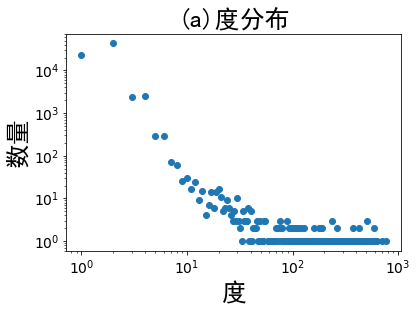

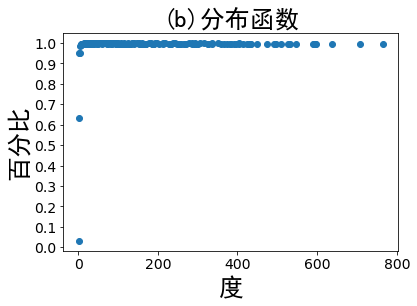

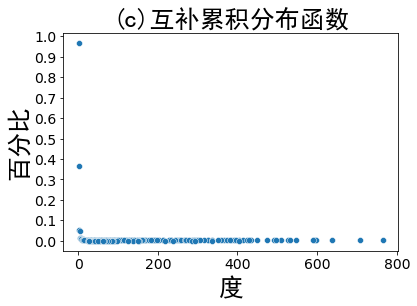

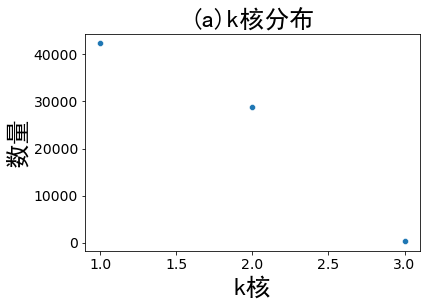

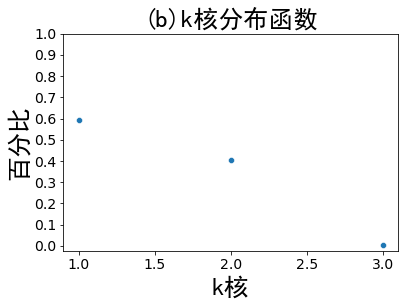

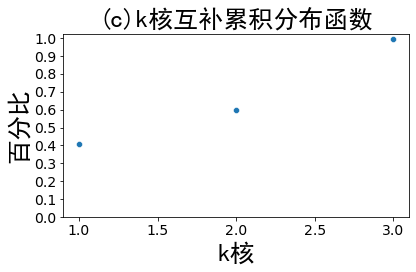

In [30]:
# 计算每个节点的度
degrees = dict(G.degree())

# 获取每个度数的数量
degree_count = Counter(degrees.values())

# 将节点度数和数量存储在不同的列表中
degree, count = zip(*list(degree_count.items()))

# 对数量进行归一化，即将其除以总节点数，得到每个节点度数在整个网络中的比例
total_nodes = len(G.nodes())
density = [float(c) / total_nodes for c in count]

# 绘制节点度分布的散点图
plt.figure()
plt.scatter(degree, count)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('度',fontsize=25, fontproperties=font)
plt.ylabel('数量',fontsize=25, fontproperties=font)
plt.title('(a)度分布',fontsize=25, fontproperties=font)
plt.show()

# 计算度分布的累积分布函数
total_density = 0
cdf = []
for x in degree:
    total_density += float(degree_count[x]) / total_nodes
    cdf.append(total_density)

# 绘制节点度分布的累积分布函数的散点图
plt.figure()
plt.scatter(degree, np.array(cdf))
plt.xlabel('度',fontsize=25, fontproperties=font)
plt.ylabel('百分比',fontsize=25, fontproperties=font)
plt.title('(b)分布函数',fontsize=25, fontproperties=font)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

#画度分布累积函数
sns.scatterplot(x=degree, y=1-np.array(cdf))
plt.title("(c)互补累积分布函数",fontsize=25, fontproperties=font)
plt.ylabel("百分比",fontsize=25, fontproperties=font)
plt.xlabel("度",fontsize=25, fontproperties=font)
# plt.xscale('log')
# plt.yscale('log')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

#计算 kcore 分布
core_number = nx.core_number(G_copy.to_undirected())
core_count = Counter(core_number.values())
k, cnt = zip(*core_count.items())

# 画 kcore 分布散点图
#sns.scatterplot(x=list(k), y=list(cnt))
# plt.figure()
# plt.plot(k,cnt)
sns.scatterplot(x=k, y=cnt)
plt.title("(a)k核分布",fontsize=25, fontproperties=font)
plt.ylabel("数量",fontsize=25, fontproperties=font)
plt.xlabel("k核",fontsize=25, fontproperties=font)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

# 计算 kcore CDF
tot_nodes = len(G.nodes())
kcore_cdf = {}
for c in list(set(core_number.values())):
    n_c = len([n for n in core_number if core_number[n] == c])
    kcore_cdf[c] = float(n_c) / tot_nodes

# plt.figure()
# plt.plot(list(kcore_cdf.keys()), list(kcore_cdf.values()))
sns.scatterplot(x=list(kcore_cdf.keys()), y=list(kcore_cdf.values()))
plt.title("(b)k核分布函数",fontsize=25, fontproperties=font)
plt.ylabel("百分比",fontsize=25, fontproperties=font)
plt.xlabel("k核",fontsize=25, fontproperties=font)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

# 计算 kcore CCDF
kcore_ccdf = {}
tot_nodes = len(G.nodes())
for c in list(set(core_number.values())):
    n_c = len([n for n in core_number if core_number[n] == c])
    kcore_ccdf[c] = 1 - float(n_c) / tot_nodes

# plt.figure()
# plt.plot(list(kcore_ccdf.keys()), list(kcore_ccdf.values()))
sns.scatterplot(x=list(kcore_ccdf.keys()), y=list(kcore_ccdf.values()))
plt.title("(c)k核互补累积分布函数",fontsize=25, fontproperties=font)
plt.ylabel("百分比",fontsize=25, fontproperties=font)
plt.xlabel("k核",fontsize=25, fontproperties=font)
plt.yticks(np.arange(0, 1.1, 0.1))
    
plt.tight_layout()
plt.show()

In [17]:
# #孤立点数
# query = """MATCH (n) WHERE NOT (n)--() RETURN COUNT(n) AS isolated_node_count"""

# # 执行查询，并将结果转换为DataFrame
# data2 = graph.run(query).data()[0]

# # 在Jupyter中显示结果
# data2

{'isolated_node_count': 0}

In [13]:
# #删除所有孤立点
# graph.run("MATCH (n) WHERE NOT (n)--() DELETE n")

(No data)